<a href="https://colab.research.google.com/github/YusufAbdurrahmann/feature-engineering/blob/main/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

# **Data Importing**

In [3]:
df = pd.read_csv("./dataset/churn_modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Data Undertsanding**

In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [10]:
df.query('RowNumber == 9998')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9997,9998,15584532,Liu,709,France,Female,36,7,0.0,1,0,1,42085.58,1


In [11]:
df.loc[:1]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


# **Data Cleaning**

In [12]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
980,981,15624729,Tsao,594,France,Male,27,0,197041.80,1,0,0,151912.49,0
2697,2698,15699450,Li,723,France,Male,48,7,0.00,2,1,1,150694.58,0
5648,5649,15600174,Walton,525,France,Male,35,7,165358.77,1,0,1,94738.54,0
3833,3834,15604792,Kuo,609,Germany,Male,38,6,140752.06,2,0,1,171430.16,0
7476,7477,15737909,Bates,759,France,Male,44,2,111095.58,2,1,0,100137.70,0


In [15]:
df["Age"]= pd.to_datetime(df["Age"])

In [18]:
df["Age"] = df["Age"].astype(int)

In [23]:
df = df.rename(columns={"RowNumber":"dd"})

In [28]:
df = df.rename(columns = {"dd":"RowNumber"})

In [33]:
df = df.rename(columns = {"Age":"Ages","Surname":"Username"})

# **Exploratory Data Analysis (EDA)**

In [37]:
df.sample(3)

,RowNumber,CustomerId,Username,CreditScore,Geography,Gender,Ages,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4989,4990,15602851,Ozioma,629,France,Male,40,9,0.00,1,1,0,106.67,0
6122,6123,15577313,Lionel,619,France,Male,44,3,116967.68,1,1,0,5075.17,1
4146,4147,15698246,Gordon,658,France,Female,24,2,0.00,2,1,1,84694.49,0


<ipython-input-47-83184ecd2fd8>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = "Exited", palette = "aqua")


<Axes: xlabel='Exited', ylabel='Count'>

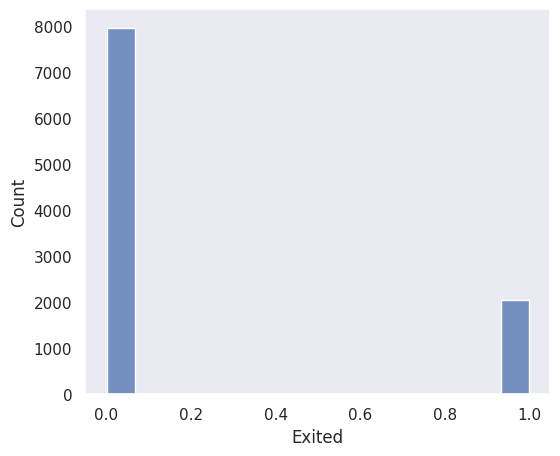

In [47]:
plt.figure(figsize = (6,5))
sns.set_theme(style = "dark")
sns.histplot(data = df, x = "Exited", palette = "aqua")

<Axes: ylabel='count'>

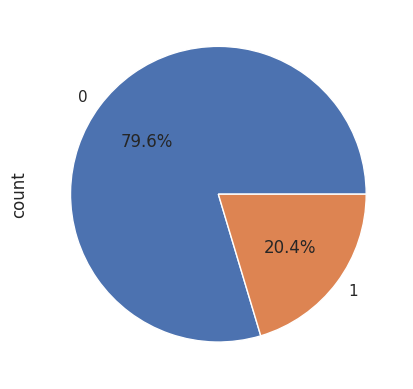

In [51]:
df["Exited"].value_counts().plot(kind = "pie", autopct = "%1.1f%%")